In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot 

In [41]:
data = pd.read_csv("C:/Users/onkar/Downloads/4_may_prj/Random Forest Project 9 & 10/10. Random Forests/Fraud_check.csv")
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [42]:
df = data.copy()

In [43]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [62]:
df['Risk'] = np.where(df['Taxable.Income'] <= 30000, 'Risky', 'Good')

In [65]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Risk_Risky
0,68833,50047,10,False,False,True,True,False
1,33700,134075,18,True,False,False,True,False
2,36925,160205,30,False,True,False,True,False
3,50190,193264,15,True,False,True,True,False
4,81002,27533,28,False,True,False,False,False


In [66]:
X = df_encoded.drop(['Risk_Risky'], axis=1)
y = df_encoded['Risk_Risky']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
print("Training features shape:",X_train.shape)
print("Testing features shape:",X_test.shape)
print("Training labels shape:",y_train.shape)
print("Testing labels shape:",y_test.shape)

Training features shape: (420, 7)
Testing features shape: (180, 7)
Training labels shape: (420,)
Testing labels shape: (180,)


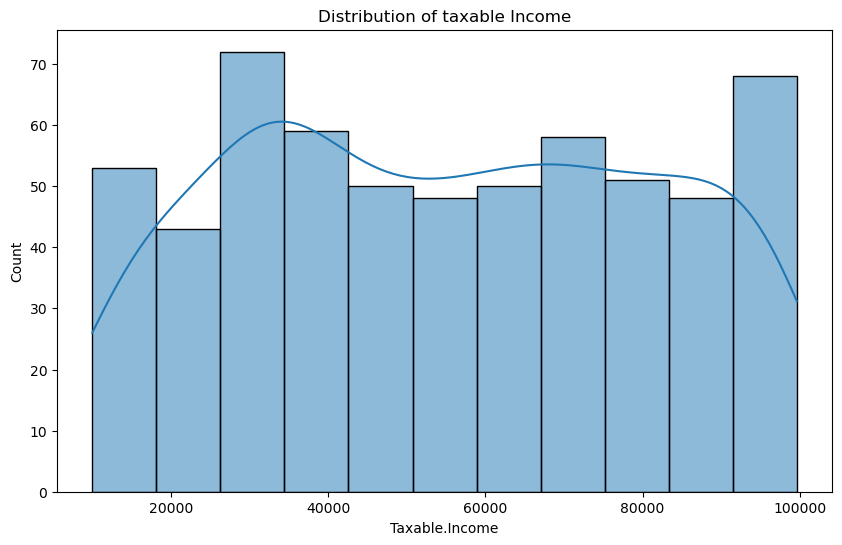

In [71]:
plt.figure(figsize=(10,6))
sns.histplot(df['Taxable.Income'],kde=True)
plt.title('Distribution of taxable Income')
plt.savefig('graphs/distribution_of_taxable_incomePRJ10.png')
plt.show()

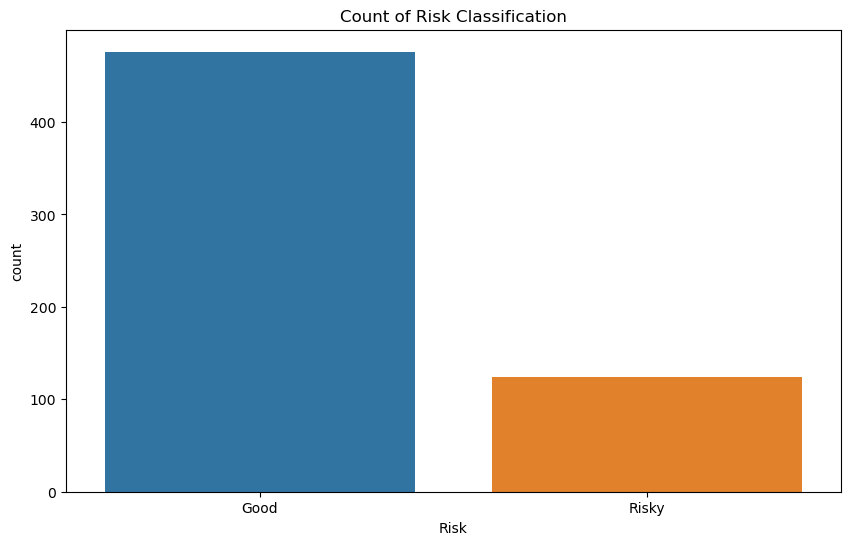

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Risk',data = df)
plt.title('Count of Risk Classification')
plt.savefig('graphs/risk_classification_count.png')
plt.show()

C:\Users\onkar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


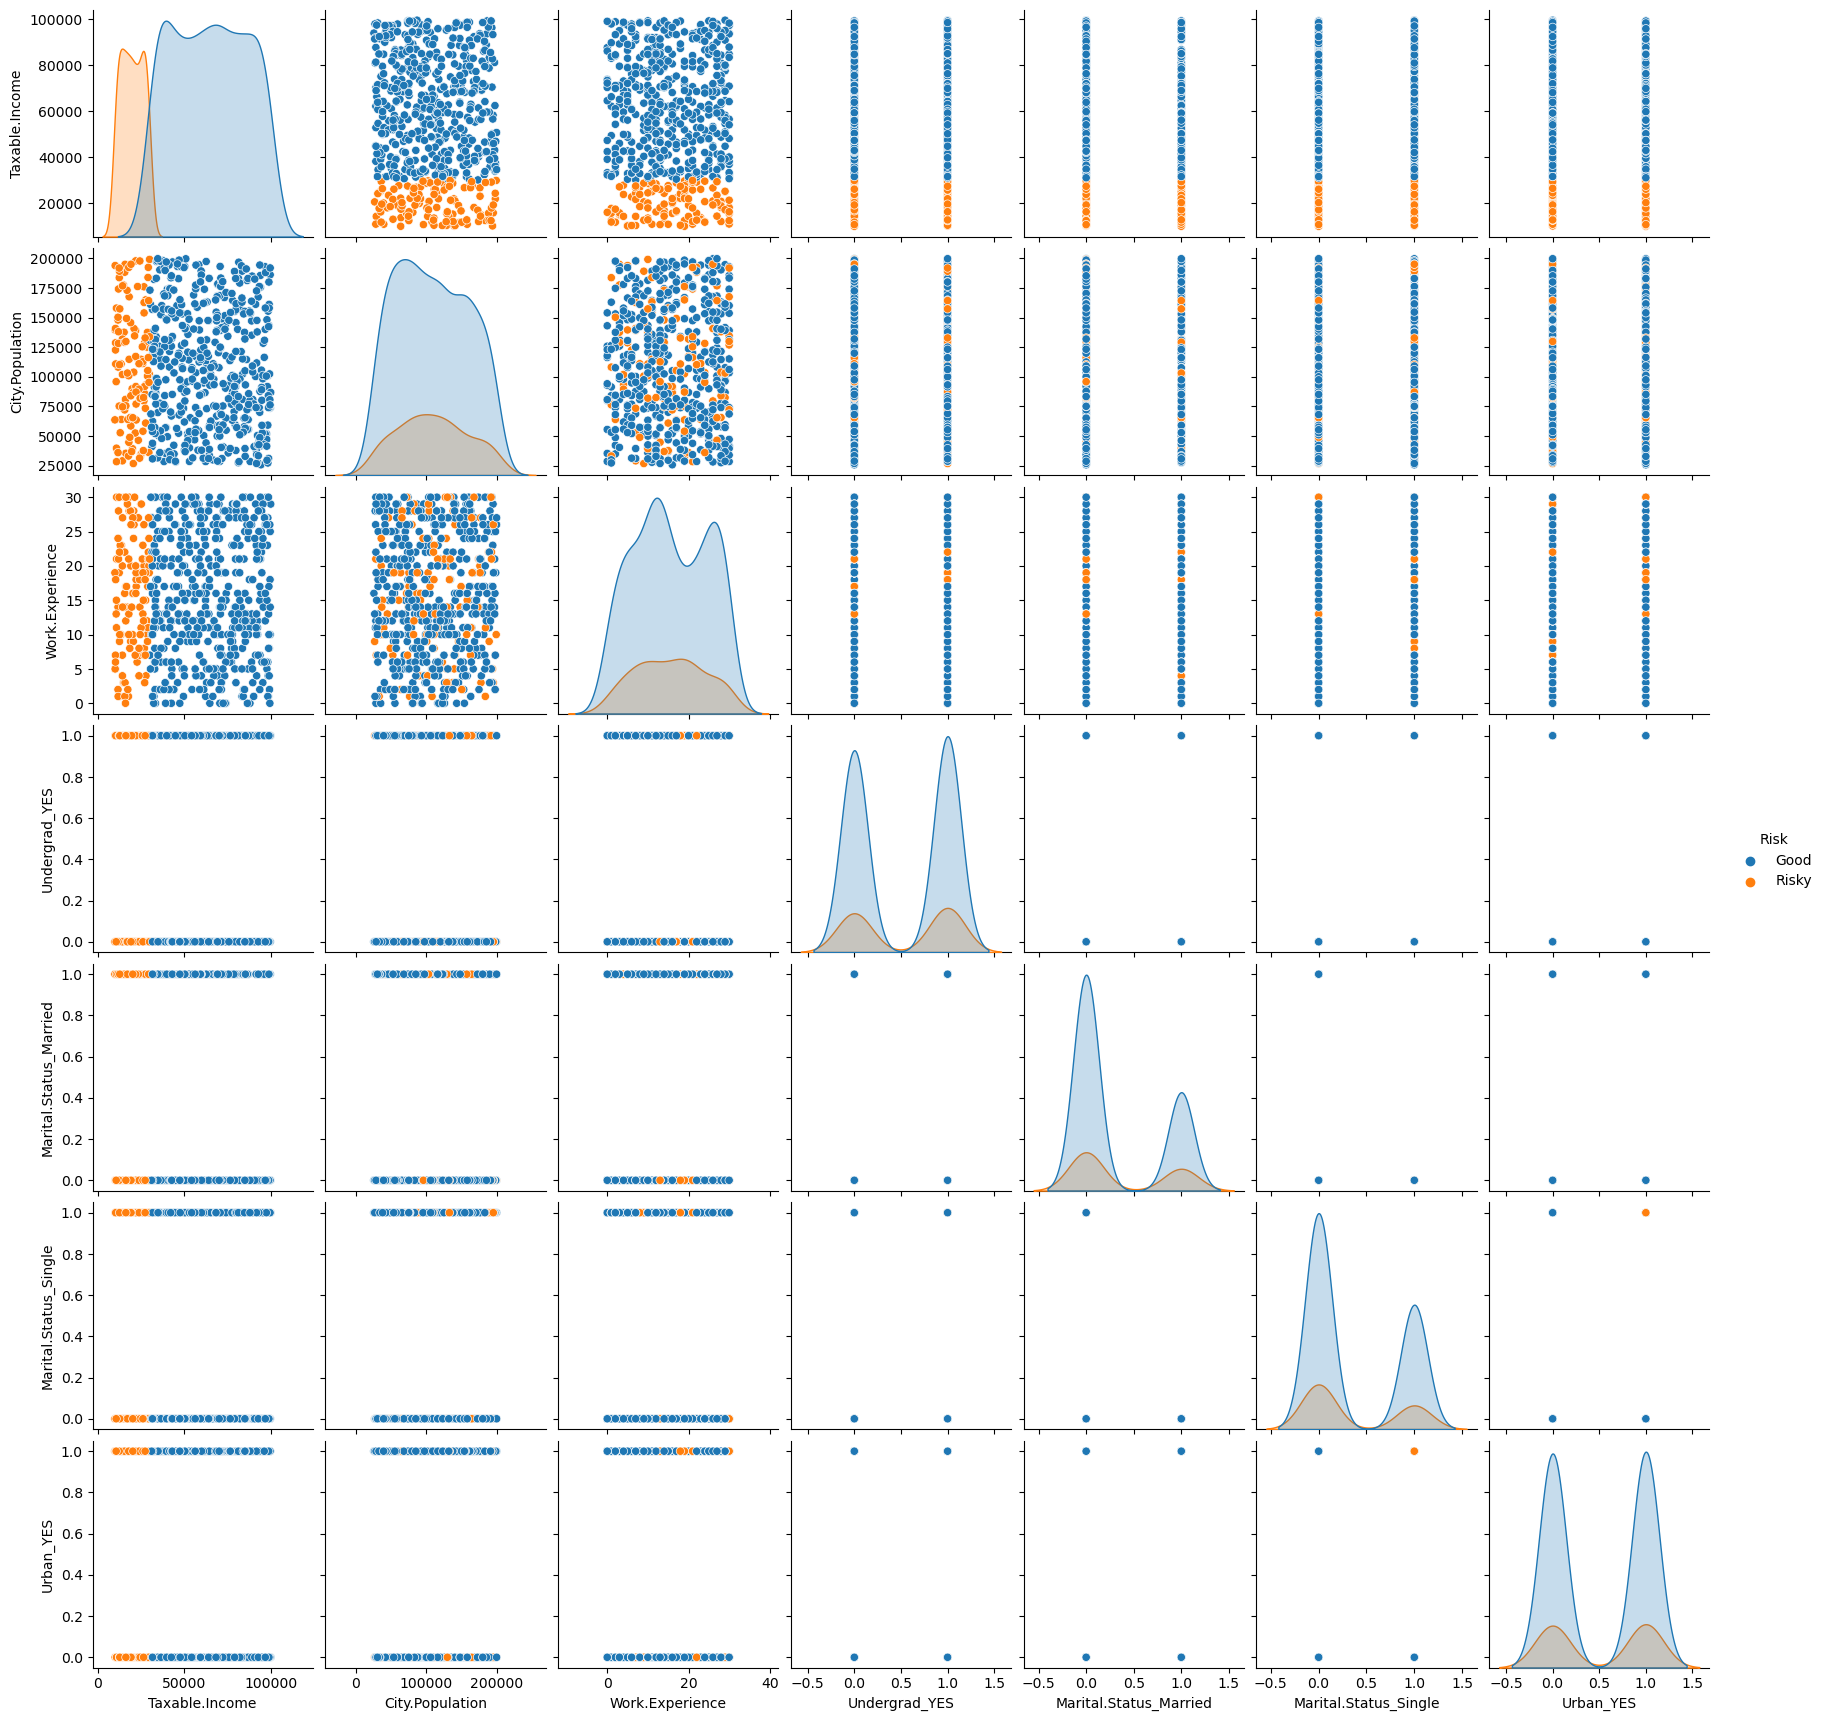

In [77]:
sns.pairplot(df, hue='Risk')
plt.savefig('graphs/pairplotPRJ10.png')
plt.show()

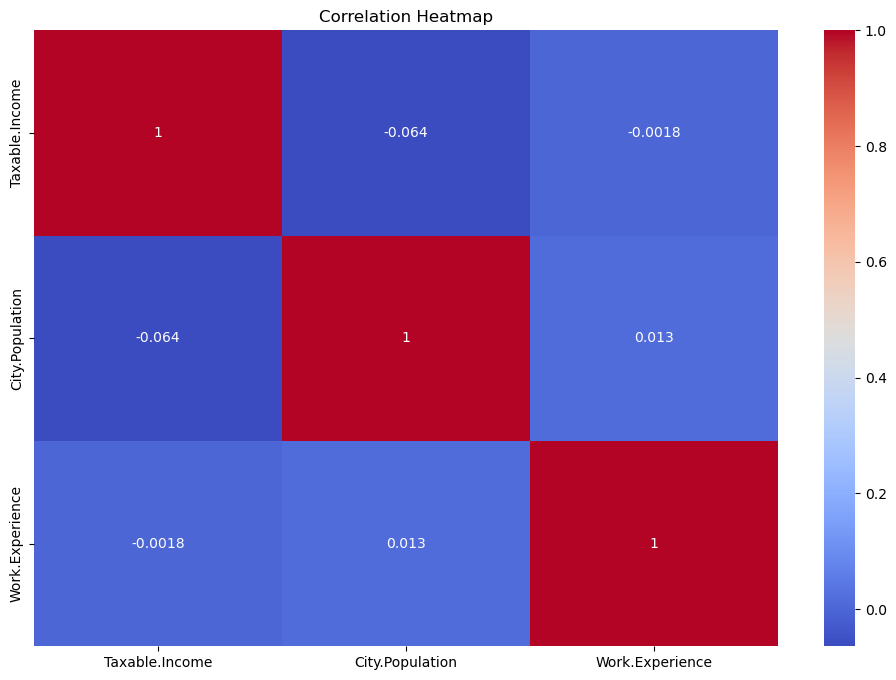

In [80]:
plt.figure(figsize=(12,8))
numeric_columns = df_encoded.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('graphs/correlation_heatmap.png')
plt.show()

In [81]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
pred = model.predict(X_test)
print("Model prediction is complete")

Model prediction is complete


In [88]:
accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test,pred)
print("Accuracy:",accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[143   0]
 [  0  37]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       143
        True       1.00      1.00      1.00        37

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180

